In [2]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as pit
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [4]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

## 확률분포
### 1. 정규분포
#### 연습

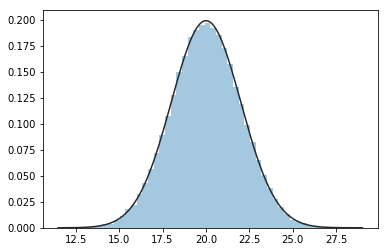

In [9]:
#seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed=1234)

# 평균 :20, 표준편차 :2, 데이터 수 :100000의 정규분포를 따르는 데이터 생성
normal = np.random.normal(20,2,100000)

# histogram
sns.distplot(normal, fit=stats.norm, kde=False)

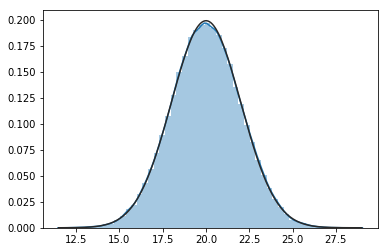

In [11]:
#seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed=1234)

# 평균 :20, 표준편차 :2, 데이터 수 :100000의 정규분포를 따르는 데이터 생성
normal = np.random.normal(20,2,100000)

# histogram
sns.distplot(normal, fit=stats.norm, kde=True)

In [12]:
normal.round(3)
#소수점 3째자리까지 나오게 하라.

array([20.943, 17.618, 22.865, ..., 20.059, 17.559, 20.768])

#### 실습

평균: 30, 표준편차: 2.5, 데이터 개수: 100000 인 정규분포를 생성해라.

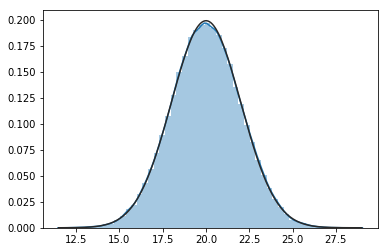

In [14]:
np.random.normal(30, 2.5, 100000)
sns.distplot(normal, fit=stats.norm, kde=True)

#### 연습
A/S작업을 수행하는데 걸리는 시간은 평균 115분, 표준편차 20분이 소요. 작업시간의 허용범위가 135분 이내라면 135분 이상 걸리는 작업비율은 어느 정도일까?

In [15]:
mu = 115
sigma = 20
x = 135

#누적확률 값 계산
prop = stats.norm.cdf(x, mu, sigma)
print("{0}분 이상 걸리는 A/S작업 비율 : {1:.1f}%".format(x,(1-prop)*100))

135분 이상 걸리는 A/S작업 비율 : 15.9%


In [16]:
mu = 115
sigma = 20
x = 155

#누적확률 값 계산
prop = stats.norm.cdf(x, mu, sigma)
print("{0}분 이상 걸리는 A/S작업 비율 : {1:.1f}%".format(x,(1-prop)*100))

155분 이상 걸리는 A/S작업 비율 : 2.3%


#### 실습
대한민국 남성의 20~30대 키를 측정한 결과, 평균 175cm, 표준편차 5cm 이다. 나의 키가 180cm일 경우에 나는 몇 % 범위에 위치할까?

In [43]:
mean = 175
sig = 5
x = 180

prop = stats.norm.cdf(x, mean, sig)
print("{0}cm 는 상위 {1:.1f}%".format(x,(1-prop)*100))

180cm 는 상위 15.9%


#### 실습
어떤 자동차 1리터당 주행거리가 평균 12km, 표준편차 3km인 정규분포를 이룬다.
* 1리터를 가지고 12km 이상 15km 이하를 달릴 확률은 얼마인가
* 1리터를 가지고 9km 이상 15km 이하를 달릴 확률은 얼마인가
* 1리터를 가지고 15km 이상을 달릴 확률은 얼마인가

In [32]:
mu = 12
sigma = 3
x = 15
y = 12

prop1 = stats.norm.cdf(x, mu, sigma)
prop2 = stats.norm.cdf(y, mu, sigma)

print("%d km 이상 %d km 이하를 달릴 확률 : %.2f" %(x, y, (prop1-prop2)*100))

15 km 이상 12 km 이하를 달릴 확률 : 34.13


In [33]:
mu = 12
sigma = 3
x = 15
y = 9

prop1 = stats.norm.cdf(x, mu, sigma)
prop2 = stats.norm.cdf(y, mu, sigma)

print("%d km 이상 %d km 이하를 달릴 확률 : %.2f" %(x, y, (prop1-prop2)*100))

15 km 이상 9 km 이하를 달릴 확률 : 68.27


In [35]:
mu = 12
sigma = 3
x = 15

prop = stats.norm.cdf(x, mu, sigma)

print("%d km 이상을 달릴 확률 : %.2f" %(x, (1-prop)*100))

15 km 이상을 달릴 확률 : 15.87


#### 연습

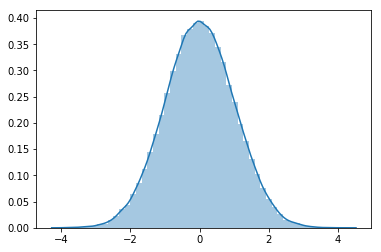

In [37]:
#seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)

#평균: 0, 표준편차: 1, 데이터 수: 100000의 정규분포를 따르는 데이터 생성
normal = np.random.normal(0, 1, 100000)

#histogram
sns.distplot(normal)

#### 실습
표준정규분포 그리기

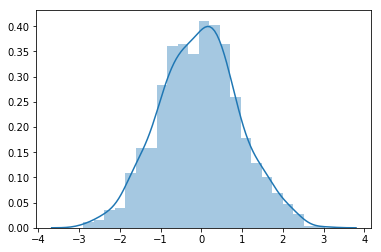

In [41]:
normal = np.random.normal(0, 1, 1000)
sns.distplot(normal)

### 2. t분포
#### 연습

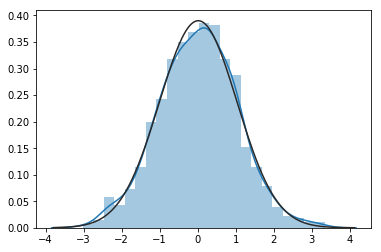

In [53]:
#seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)

#자유도: 29, 데이터 수: 1000개의 t분포를 따르는 데이터 생성
t_df29 = np.random.standard_t(df=29, size=1000)

#histogram, fit: 정규분포 선 생성, kde: t분포의 kde 생성 안 함
sns.distplot(t_df29, fit = stats.norm, kde = True)
#kde = True : 정규분포와 t분포 동시에 보여준다 (검정색:정규분포)

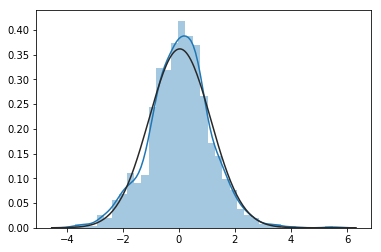

In [51]:
#seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)

#자유도: 10, 데이터 수: 1000개의 t분포를 따르는 데이터 생성
t_df10 = np.random.standard_t(df=10, size=1000)

#histogram, fit: 정규분포 선 생성, kde: t분포의 kde 생성 안 함
sns.distplot(t_df10, fit = stats.norm, kde = True)

#### 실습

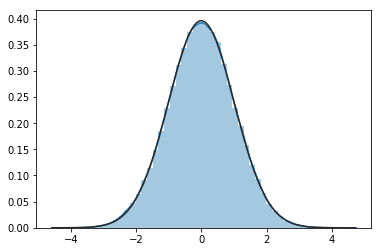

In [54]:
#자유도: 1000, 데이터 수: 100000

t_df1000 = np.random.standard_t(df=1000, size=100000)
sns.distplot(t_df1000, fit = stats.norm, kde = True)

#### 연습
확률변수 t는 자유도가 5인 t-분포를 따른다. t값이 1.53일 때, P(T<=t)을 계산하시오.

In [57]:
t = 1.53
df = 5
prop = stats.t.cdf(t, df)
print("P(T<={0}) : {1:.3f}" .format(t,prop))

#{}안의 수는 순서! format을 넣어주는 ?

P(T<=1.53) : 0.907


In [58]:
t = 1.96
df = 5
prop = stats.t.cdf(t, df)
print("P(T<={0}) : {1:.3f}" .format(t,prop))

P(T<=1.96) : 0.946


In [63]:
stats.norm.cdf(1.96)

#정규분포랑 비교해보자

0.9750021048517795

In [64]:
t = 1.96
df = 10000
prop = stats.t.cdf(t, df)
print("P(T<={0}) : {1:.3f}" .format(t,prop))

P(T<=1.96) : 0.975


#### 실습
확률변수 t는 자유도가 10인 t-분포를 따른다. t값이 2.0일 때, P(T<=t)을 계산하시오.

In [65]:
t = 2
df = 10
prop = stats.t.cdf(t, df)
print("P(T<={0}) : {1:.3f}" .format(t,prop))

P(T<=2) : 0.963


### 3. 카이제곱분포
#### 연습

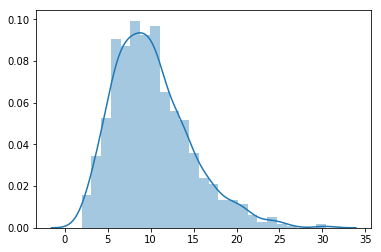

In [66]:
#seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)

#자유도: 10, 데이터 수: 1000개의 카이제곱분포를 따르는 데이터 생성
chisq_df10 = np.random.chisquare(df = 10, size = 1000)

#histogram, kde: 카이제곱분포의 kde 생성
sns.distplot(chisq_df10, kde = True)

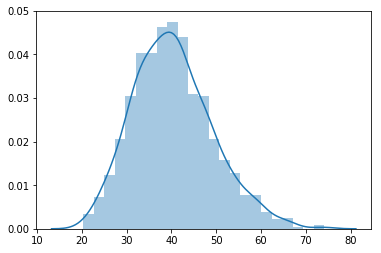

In [71]:
#seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)

#자유도: 40, 데이터 수: 1000개의 카이제곱분포를 따르는 데이터 생성
chisq_df40 = np.random.chisquare(df = 40, size = 1000)

#histogram, kde: 카이제곱분포의 kde 생성
sns.distplot(chisq_df40, kde = True)

#### 연습
확률변수 카이제곱은 자유도가 30인 z^2-분포를 따른다. 카이제곱값이 10일 때, P(X<=z^2)을 계산하시오.

In [81]:
chisq = 10
df = 30
prop = stats.chi2.cdf(chisq, df)
print("P(X<={0}): {1:.4f}".format(chisq, prop))

P(X<=10): 0.0002


In [77]:
chisq = 10
df = 30
p = stats.chi2.pdf(chisq, df)
print("P(X={0}): {1:.4f}".format(chisq, p))

P(X=10): 0.0002


#### 실습

In [78]:
chisq = 3
df = 8
prop = stats.chi2.cdf(chisq, df)
print("P(X<={0}): {1:.4f}".format(chisq, prop))

P(X<=3): 0.0656


### 4. F분포
#### 연습

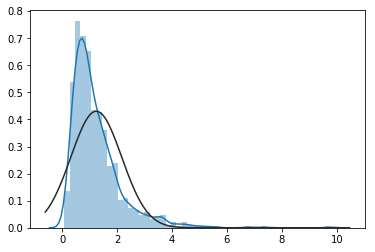

In [105]:
#seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)

#분자 자유도: 10, 분모 자유도: 10
#데이터 수: 1000개의 F분포를 따르는 데이터 생성
#dfnum: 분자 dfden: 분모
F_df10_10 = np.random.f(dfnum = 10, dfden = 10, size = 1000)

#histogram, kde: F분포의 kde 생성
sns.distplot(F_df10_10,fit = stats.norm, kde = True)

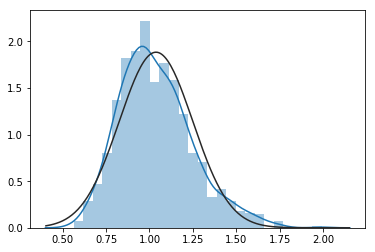

In [98]:
#seed 선택을 하여 매번 실행 시 동일한 값이 나오도록 설정
np.random.seed(seed = 1234)

#분자 자유도: 100, 분모 자유도: 100
#데이터 수: 1000개의 F분포를 따르는 데이터 생성
F_df100_100 = np.random.f(dfnum = 100, dfden = 100, size = 1000)

#histogram, kde: F분포의 kde 생성
sns.distplot(F_df100_100, fit = stats.norm, kde = True)

#### 실습

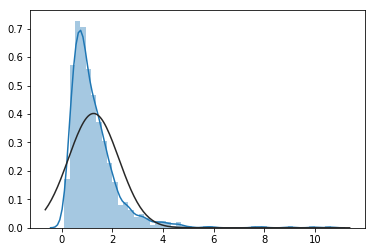

In [89]:
F_df1010 = np.random.f(dfnum = 10, dfden = 10, size = 1000)

sns.distplot(F_df1010, fit = stats.norm, kde = True)

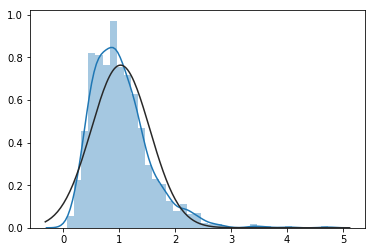

In [90]:
F_df1050 = np.random.f(dfnum = 10, dfden = 50, size = 1000)

sns.distplot(F_df1050, fit = stats.norm,  kde = True)

#### 연습
확률변수 F는 각각 자유도가 15, 15 인 F-분포를 따른다. 값이 2일 때, P(X<=F)을 계산하시오.

In [109]:
f = 2
dfnum = 15
dfden = 15
prop = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X<={0}): {1:.3f}".format(f, prop))

P(X<=2): 0.904


### 5. 와이블 분포
#### 연습
어떤 제품의 수명시간 X가 형상모수 2.2, 척도모수 1,200인 와이블 분포를 따른다고 할 때, 이 제품이 적어도 1,500시간 이상 작동할 확률을 구하라.

In [112]:
#와이블 분포를 그릴 수 없다 아직(?)

x = 1500
alpha = 2.2
beta = 1200
prop = stats.weibull_min.cdf(x, alpha, scale = beta)
print("P(X>={0}): {1:.5f}".format(x, (1-prop)))

P(X>=1500): 0.19518


#### 실습
어떤 제품의 수명시간 X가 형상모수 5.2, 척도모수 2,200인 와이블 분포를 따른다고 할 때, 이 제품이 적어도 2,500시간 이상 작동할 확률을 구하라.

In [114]:
x = 2500
alpha = 5.2
beta = 2200
prop = stats.weibull_min.cdf(x, alpha, scale = beta)
print("P(X>={0}): {1:.5f}".format(x, (1-prop)))

P(X>=2500): 0.14313


척도모수가 1500, 형상모수가 2.5인 와이블 분포로, 1200이상일 확률을 구하라.

In [113]:
x = 1200
alpha = 2.5
beta = 1500
prop = stats.weibull_min.cdf(x, alpha, scale = beta)
print("P(X>={0}): {1:.5f}".format(x, (1-prop)))

P(X>=1200): 0.56415


### 6. 이항분포
#### 연습
도장공정에서 광택도 불량이 40%. 3대의 차량을 임시로 선택했을 때 불량대수가 각각 0,1,2,3대가 나올 확률은 얼마인가?

In [115]:
n = 3
for i in range(n+1):
    prop = stats.binom.pmf(k=i, n=n, p=0.4)
    print("P(X={0}) = {1:.3f}".format(i,prop))

P(X=0) = 0.216
P(X=1) = 0.432
P(X=2) = 0.288
P(X=3) = 0.064


#### 실습
도정공정에서 광택도 불량이 30%. 5대의 차량을 임의로 선택했을 때 불량대수가 각각 0,1,2,3,4,5대가 나올 확률은 얼마인가?

In [116]:
n = 5
for i in range(n+1):
    prop = stats.binom.pmf(k=i, n=n, p=0.3)
    print("P(X={0}) = {1:.3f}".format(i,prop))

P(X=0) = 0.168
P(X=1) = 0.360
P(X=2) = 0.309
P(X=3) = 0.132
P(X=4) = 0.028
P(X=5) = 0.002


### 7. 포아송분포
#### 연습
어느 전화 교환대에는 1분당 평균 2회의 전화가 걸려 온다고 한다. 전화의 도착 횟수가 포아송분포를 따른다면,
* 이 교환대에 1분당 3번의 전화가 걸려올 확률은 얼마인가?
* 이 교환대에 1분ㄷㅇ 최대 2회 이하의 전화가 걸려올 확률은 얼마인가? 

In [122]:
#평균
mu = 2

#1분당 3번의 전화가 걸려올 확률
prop = stats.poisson.pmf(3, mu)

#1분당 최대 2회 이하의 전화가 걸려올 확률
cdf_prop = stats.poisson.cdf(2, mu)

#3회 이하의 전화가 걸려올 확률
cdf_prop1 = stats.poisson.cdf(3, mu)

print("1분당 {0}번의 전화가 걸려올 확률: {1:.4f}".format(3, prop))
print("1분당 최대 {0}회 이하의 전화가 걸려올 확률:{1:.4f}".format(2, cdf_prop))
print("1분당 최대 {0}회 이하의 전화가 걸려올 확률:{1:.4f}".format(3, cdf_prop1))

1분당 3번의 전화가 걸려올 확률: 0.1804
1분당 최대 2회 이하의 전화가 걸려올 확률:0.6767
1분당 최대 3회 이하의 전화가 걸려올 확률:0.8571


#### 실습
한 상점에서는 평균 1시간에 2명씩 포아송분포로 손님이 도착한다. 이 때 10시에서 11시 사이에 다음이 발생할 확률을 구하시오.
* 2명의 손님이 도착
* 1명 이하의 손님이 도착
* 3명 이상의 손님이 도착

In [124]:
mu = 2

prop = stats.poisson.pmf(2, mu)
cdf_prop1 = stats.poisson.cdf(1, mu)
cdf_prop2 = stats.poisson.cdf(2, mu)

print("1분당 {0}명의 손님이 도착할 확률: {1:.4f}".format(2, prop))
print("1분당 최대 {0}명 이하의 손님이 도착할 확률:{1:.4f}".format(1, cdf_prop1))
print("1분당 최대 {0}명 이상의 손님이 도착할 확률:{1:.4f}".format(3, (1-cdf_prop2)))

1분당 2명의 손님이 도착할 확률: 0.2707
1분당 최대 1명 이하의 손님이 도착할 확률:0.4060
1분당 최대 3명 이상의 손님이 도착할 확률:0.3233


## 기술통계
### 1. 기술통계치
#### 연습
자동차 연비 data set 에서 기술통계치 구하기
* 고속도로에서 연비 통계치 구하기 : 자동차 모델 별 데이터 수, 데이터 수, 평균, 중앙값, 표준편차, min, max, Q1, Q3
* 항목명 : manufacturer, model, displacement, year, cylinder, driving, mpg, highway_mileage, fuel, class

In [134]:
#mycars 데이터가 아닌 mpg 데이터 같습니다.(? 뭔 말 ?)

#mycars 데이터 가져오기(데이터의 경로 확인: cars.csv)
ds_mycars = pd.read_csv("data/mycars.csv")

#모델, mpg 데이터 subset
df = ds_mycars[['model', 'mpg']]

#모델 별 데이터 수 평균 표준편차
df.groupby('model').describe()

mpg                                                 \
                       count       mean       std   min    25%   50%    75%   
model                                                                         
4runner 4wd              6.0  15.166667  0.752773  14.0  15.00  15.0  15.75   
a4                       7.0  18.857143  1.864454  16.0  18.00  18.0  20.50   
a4 quattro               8.0  17.125000  1.807722  15.0  15.75  17.0  18.25   
a6 quattro               3.0  16.000000  1.000000  15.0  15.50  16.0  16.50   
altima                   6.0  20.666667  1.966384  19.0  19.00  20.0  22.50   
c1500 suburban 2wd       5.0  12.800000  1.303840  11.0  12.00  13.0  14.00   
camry                    7.0  19.857143  1.463850  18.0  18.50  21.0  21.00   
camry solara             7.0  19.857143  1.772811  18.0  18.00  21.0  21.00   
caravan 2wd             11.0  15.818182  1.834022  11.0  15.50  16.0  17.00   
civic                    9.0  24.444444  1.943651  21.0  24.00  24.0  25.00   
corolla                  5.0  25.600000  1.673320  24.0  24.00  26.0  26.00   
corvette                 5.0  15.400000  0.547723  15.0  15.00  15.0  16.00   
dakota pickup 4wd        9.0  12.777778  1.986063   9.0  11.00  14.0  14.00   
durango 4wd              7.0  11.857143  1.573592   9.0  11.00  13.0  13.00   
expedition 2wd           3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
explorer 4wd             6.0  13.666667  0.816497  13.0  13.00  13.5  14.00   
f150 pickup 4wd          7.0  13.000000  1.000000  11.0  13.00  13.0  13.50   
forester awd             6.0  18.833333  0.983192  18.0  18.00  18.5  19.75   
grand cherokee 4wd       8.0  13.500000  2.507133   9.0  12.50  14.0  15.00   
grand prix               5.0  17.000000  1.000000  16.0  16.00  17.0  18.00   
gti                      5.0  20.000000  2.000000  17.0  19.00  21.0  21.00   
impreza awd              8.0  19.625000  0.744024  19.0  19.00  19.5  20.00   
jetta                    9.0  21.222222  4.867694  16.0  19.00  21.0  21.00   
k1500 tahoe 4wd          4.0  12.500000  1.732051  11.0  11.00  12.5  14.00   
land cruiser wagon 4wd   2.0  12.000000  1.414214  11.0  11.50  12.0  12.50   
malibu                   5.0  18.800000  1.923538  17.0  18.00  18.0  19.00   
maxima                   3.0  18.666667  0.577350  18.0  18.50  19.0  19.00   
mountaineer 4wd          4.0  13.250000  0.500000  13.0  13.00  13.0  13.25   
mustang                  9.0  15.888889  1.452966  14.0  15.00  15.0  17.00   
navigator 2wd            3.0  11.333333  0.577350  11.0  11.00  11.0  11.50   
new beetle               6.0  24.000000  6.511528  19.0  20.00  20.5  27.00   
passat                   7.0  18.571429  1.902379  16.0  17.50  18.0  20.00   
pathfinder 4wd           4.0  13.750000  1.258306  12.0  13.50  14.0  14.25   
ram 1500 pickup 4wd     10.0  11.400000  1.505545   9.0  11.00  11.5  12.75   
range rover              4.0  11.500000  0.577350  11.0  11.00  11.5  12.00   
sonata                   7.0  19.000000  1.414214  18.0  18.00  18.0  20.00   
tiburon                  7.0  18.285714  1.603567  16.0  17.00  19.0  19.50   
toyota tacoma 4wd        7.0  15.571429  0.786796  15.0  15.00  15.0  16.00   

                              
                         max  
model                         
4runner 4wd             16.0  
a4                      21.0  
a4 quattro              20.0  
a6 quattro              17.0  
altima                  23.0  
c1500 suburban 2wd      14.0  
camry                   21.0  
camry solara            22.0  
caravan 2wd             18.0  
civic                   28.0  
corolla                 28.0  
corvette                16.0  
dakota pickup 4wd       15.0  
durango 4wd             13.0  
expedition 2wd          12.0  
explorer 4wd            15.0  
f150 pickup 4wd         14.0  
forester awd            20.0  
grand cherokee 4wd      17.0  
grand prix              18.0  
gti                     22.0  
impreza awd             21.0  
jetta     

In [137]:
ds_mycars.head(10)

,manufacturer,model,displacement,year,cylinder,automatic,driving,mpg,highway_mileage,fuel,class
0,audi,a4,1.8,1999,4,auto,f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual,f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual,f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto,f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto,f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual,f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto,f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual,4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto,4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual,4,20,28,p,compact


#### 실습
자동차 연비 data set 에서 기술통계치 구하기
* 시내에서 연비(mpg) 통계치 구하기 : 제조사별 데이터 수, 평균, 중앙값, 표준편차, min, max, Q1, Q3
* 시내에서 연비(mpg) 통계치 구하기 : 구동 방식별 데이터 수, 평균, 중앙값, 표준편차, min, max, Q1, Q3

In [138]:
ds_mycars = pd.read_csv("data/mycars.csv")

#제조사, mpg 데이터 subset
df = ds_mycars[['manufacturer', 'mpg']]

#제조사별 데이터 수 평균 표준편차
df.groupby('manufacturer').describe()

mpg                                                    
             count       mean       std   min   25%   50%    75%   max
manufacturer                                                          
audi          18.0  17.611111  1.974511  15.0  16.0  17.5  18.75  21.0
chevrolet     19.0  15.000000  2.924988  11.0  13.5  15.0  16.50  22.0
dodge         37.0  13.135135  2.485091   9.0  11.0  13.0  15.00  18.0
ford          25.0  14.000000  1.914854  11.0  13.0  14.0  15.00  18.0
honda          9.0  24.444444  1.943651  21.0  24.0  24.0  25.00  28.0
hyundai       14.0  18.642857  1.499084  16.0  18.0  18.5  19.75  21.0
jeep           8.0  13.500000  2.507133   9.0  12.5  14.0  15.00  17.0
land rover     4.0  11.500000  0.577350  11.0  11.0  11.5  12.00  12.0
lincoln        3.0  11.333333  0.577350  11.0  11.0  11.0  11.50  12.0
mercury        4.0  13.250000  0.500000  13.0  13.0  13.0  13.25  14.0
nissan        13.0  18.076923  3.426892  12.0  15.0  19.0  19.00  23.0
pontiac        5.0  17.000000  1.000000  16.0  16.0  17.0  18.00  18.0
subaru        14.0  19.285714  0.913874  18.0  19.0  19.0  20.00  21.0
toyota        34.0  18.529412  4.046961  11.0  15.0  18.0  21.00  28.0
volkswagen    27.0  20.925926  4.556702  16.0  18.5  21.0  21.00  35.0

In [139]:
ds_mycars = pd.read_csv("data/mycars.csv")

#구동방식, mpg 데이터 subset
df = ds_mycars[['automatic', 'mpg']]

#구동방식별 데이터 수 평균 표준편차
df.groupby('automatic').describe()

mpg                                                  
           count       mean       std  min   25%   50%   75%   max
automatic                                                         
auto       157.0  15.968153  3.848777  9.0  13.0  16.0  18.0  29.0
manual      77.0  18.675325  4.488118  9.0  15.0  18.0  21.0  35.0

#### 연습
* 제품의 품질을 조사하여, 제품별 결함과 결함이 발생한 기간을 조사한 테이블입니다. 범주형 데이터에 대해, counts, percents, cumulative counts, cumulative percents 계산 바랍니다.
* 속성: Flaws, Period, Strength, Baking Time, Cabbage weight

In [143]:
#EXH_QC1 데이터 가져오기
ds_Exh_QC1 = pd.read_csv("data/EXH_QC1.csv")
df = ds_Exh_QC1[['Flaws', 'Period']]

#Flaws 변수 Count: value_count, 순서대로 정렬: sort_index
count = df['Flaws'].value_counts().sort_index()

#CumCnt 계산: cumsum
cumcnt = np.cumsum(count)

#Percent 계산: 직접
percent = count/sum(count) * 100

#CumPct 계산: cumsum
cumpct = np.cumsum(percent)

#DataFrame으로 취합
count_data = pd.DataFrame({'Count': count, 'CumCnt': cumcnt, 'Percent': percent, 'CumPct': cumpct})

#Column의 name(좌측상단 이름) 생성
count_data.columns.name='Flaws'

#결과확인
count_data

Flaws,Count,CumCnt,Percent,CumPct
Other,6,6,15.0,15.0
Peel,15,21,37.5,52.5
Scratch,13,34,32.5,85.0
Smudge,6,40,15.0,100.0


#### 연습

In [150]:
count2 = df['Period'].value_counts().sort_index()
cumcnt2 = np.cumsum(count2)
percent2 = count2/sum(count2)*100
cumpct2 = np.cumsum(percent2)
count_data2 = pd.DataFrame({'Count': count2, 'CumCnt': cumcnt2, 'Percent': percent2, 'CumPct': cumpct2})
count_data2.columns.name='Period'
count_data2

Period,Count,CumCnt,Percent,CumPct
Day,7,7,17.5,17.5
Evening,7,14,17.5,35.0
Night,19,33,47.5,82.5
Weekend,7,40,17.5,100.0


#### 실습
다음 데이터는 자동차의 모델과 연비(mpg)에 대한 자료를 조사한 테이블입니다. 이 범주형 데이터에 대해 counts, percent, cumulative counts, cumulative percents를 계산 바랍니다.

In [155]:
ds_mycars = pd.read_csv("data/mycars.csv")

count = ds_mycars['manufacturer'].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count/sum(count)*100
cumpct = np.cumsum(percent)
count_data = pd.DataFrame({'Count': count, 'CumCnt': cumcnt, 'Percent': percent, 'CumPct': cumpct})
count_data.columns.name='manufacturer'
count_data

manufacturer,Count,CumCnt,Percent,CumPct
audi,18,18,7.692308,7.692308
chevrolet,19,37,8.119658,15.811966
dodge,37,74,15.811966,31.623932
ford,25,99,10.683761,42.307692
honda,9,108,3.846154,46.153846
hyundai,14,122,5.982906,52.136752
jeep,8,130,3.418803,55.555556
land rover,4,134,1.709402,57.264957
lincoln,3,137,1.282051,58.547009
mercury,4,141,1.709402,60.256410
